### Import the libraries

In [5]:
import os
import shutil
import numpy as np
import pandas as pd
import cv2
import imageio
from datetime import datetime as dt
import matplotlib.pyplot as plt
import random
from PIL import Image

Dataset is downloaded from: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria/

### Utility functions

In [6]:
#A utility function to resize a given input image 
def resize_image(image):
    resized_image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA) #Resize all the images to 128X128 dimensions
    return resized_image

### Data preparation Stage 1: Create train, test, validation folders

Here, we will create the folders 'train', 'validation, and 'test', which we will use to train, validate and test our models performance on unseen data.

In [3]:
source = 'cell_images'
destination = 'data'

#We will check if the folder 'data','train','test','validation' exists. If its not, we will create a folder with the same name
os.mkdir(destination) if not os.path.isdir(destination) else None
os.mkdir(destination+"/train") if not os.path.isdir(destination+"/train") else None
os.mkdir(destination+"/validation") if not os.path.isdir(destination+"/validation") else None
os.mkdir(destination+"/test") if not os.path.isdir(destination+"/test") else None

#We will check if the folder 'Parasitized' and 'Uninfected' exists. If its not, we will create a folder with the same name
os.mkdir(destination+"/train"+"/Parasitized") if not os.path.isdir(destination+"/train"+"/Parasitized") else None
os.mkdir(destination+"/train"+"/Uninfected") if not os.path.isdir(destination+"/train"+"/Uninfected") else None

os.mkdir(destination+"/validation"+"/Parasitized") if not os.path.isdir(destination+"/validation"+"/Parasitized") else None
os.mkdir(destination+"/validation"+"/Uninfected") if not os.path.isdir(destination+"/validation"+"/Uninfected") else None

os.mkdir(destination+"/test"+"/Parasitized") if not os.path.isdir(destination+"/test"+"/Parasitized") else None
os.mkdir(destination+"/test"+"/Uninfected") if not os.path.isdir(destination+"/test"+"/Uninfected") else None

In [4]:
#Get all the filenames from the original "cell_images" data folder
par_filenames=os.listdir(source+"/Parasitized")
un_filenames=os.listdir(source+"/Uninfected")

#Get details about the number of images present
print("Number of images of type 'Parasitized': ",len(par_filenames))
print("Number of images of type 'Uninfected': ",len(un_filenames))

Number of images of type 'Parasitized':  13779
Number of images of type 'Uninfected':  13779


### Data preparation Stage 2: Split the data into train, test and validation

We will split these images into train, test and cross validation dataset. We will randomly take 8000 images for training, 3000 for validation and the remaining 2779 images for evaluating the models performance on unseen data. With this idea in mind let's split our actual dataset into three folders mentioned above

In [5]:
st=dt.now()

#First, the Parasitized images
par_train_images=random.sample(par_filenames,8000)
par_val_images=random.sample(list(set(par_filenames)-set(par_train_images)),3000)
par_test_images=list(set(par_filenames)-set(par_train_images)-set(par_val_images))

for file in par_train_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Parasitized"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/train"+"/Parasitized/"+file,resized_image)
print("Train folder created for Parasitized images...")
        
for file in par_val_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Parasitized"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/validation"+"/Parasitized/"+file,resized_image)
print("Validation folder created for Parasitized images...")
        
for file in par_test_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Parasitized"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/test"+"/Parasitized/"+file,resized_image)
print("Test folder created for Parasitized images...")
        
#Now, the uninfected files
un_train_images=random.sample(un_filenames,8000)
un_val_images=random.sample(list(set(un_filenames)-set(un_train_images)),3000)
un_test_images=list(set(un_filenames)-set(un_train_images)-set(un_val_images))

for file in un_train_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Uninfected"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/train"+"/Uninfected/"+file,resized_image)
print("Train folder created for Uninfected images...")

for file in un_val_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Uninfected"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/validation"+"/Uninfected/"+file,resized_image)
print("Validation folder created for Uninfected images...")
    
for file in un_test_images:
    if (file.endswith("png")):
        image=imageio.imread(source+"/Uninfected"+"/"+file)
        resized_image=resize_image(image)
        imageio.imsave(destination+"/test"+"/Uninfected/"+file,resized_image)  
print("Test folder created for Uninfected images...")
        
print("\nTotal time taken to resize the images and create the dataset: ",dt.now()-st)

Train folder created for Parasitized images...
Validation folder created for Parasitized images...
Test folder created for Parasitized images...
Train folder created for Uninfected images...
Validation folder created for Uninfected images...
Test folder created for Uninfected images...

Total time taken to resize the images and create the dataset:  0:15:09.348374


### Data preparation Stage 3: Vectorize each image and store them in pickle files

In [7]:
#Train files
train_file_names = ["data/train/Parasitized/"+fname for fname in os.listdir("data/train/Parasitized/")] + ["data/train/Uninfected/"+fname for fname in os.listdir("data/train/Uninfected/")]
X_train = [imageio.imread(image) for image in train_file_names]
X_train = np.array(X_train)
y_train = ["Parasitized"]*8000 + ["Uninfected"]*8000

#Validation files
val_file_names = ["data/validation/Parasitized/"+fname for fname in os.listdir("data/validation/Parasitized/")] + ["data/validation/Uninfected/"+fname for fname in os.listdir("data/validation/Uninfected/")]
X_val = [imageio.imread(image) for image in val_file_names]
X_val = np.array(X_val)
y_val = ["Parasitized"]*3000 + ["Uninfected"]*3000

#Test files
test_file_names = ["data/test/Parasitized/"+fname for fname in os.listdir("data/test/Parasitized/")] + ["data/test/Uninfected/"+fname for fname in os.listdir("data/test/Uninfected/")]
X_test = [imageio.imread(image) for image in test_file_names]
X_test = np.array(X_test)
y_test = ["Parasitized"]*3000 + ["Uninfected"]*3000

#Scaling all the values between 0 and 1
X_train = X_train.astype('float32')
X_val  = X_val.astype('float32')
X_test  = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

print("Shape of the train dataset: ",X_train.shape)
print("Shape of the validation dataset: ",X_val.shape)
print("Shape of the test dataset: ",X_test.shape)

Shape of the train dataset:  (16000, 128, 128, 3)
Shape of the validation dataset:  (6000, 128, 128, 3)
Shape of the test dataset:  (5558, 128, 128, 3)


In [ ]:
#Store the datasets in pickle files
os.mkdir("normalized_data") if not os.path.isdir("normalized_data") else None


### Display sample images of type 'Parasitized'

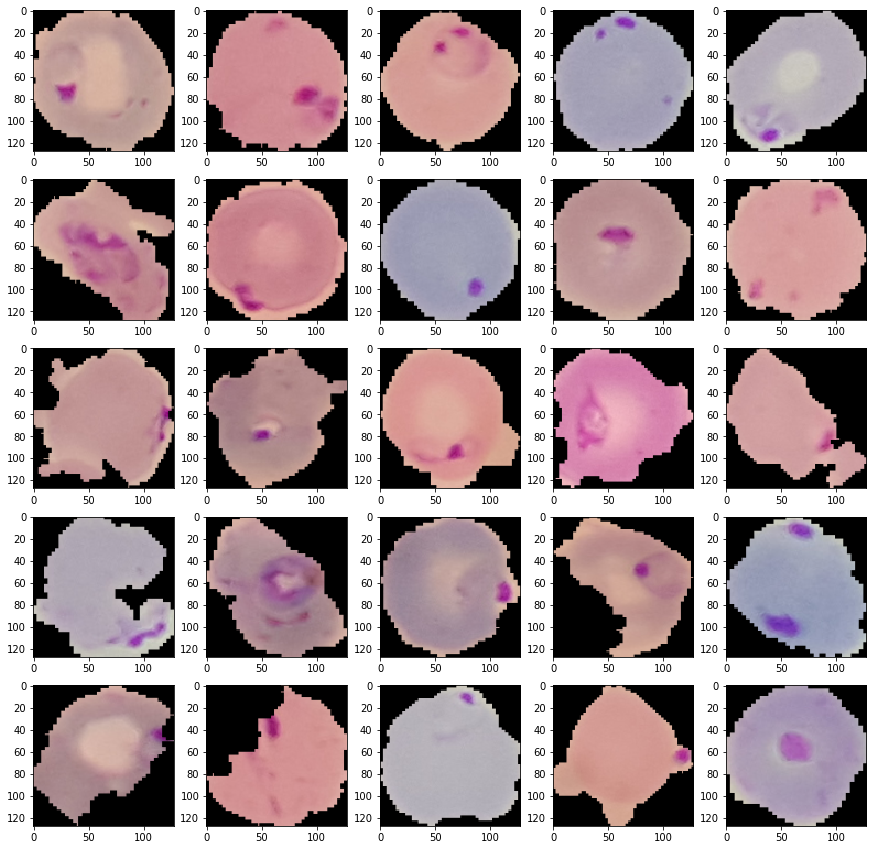

In [8]:
image_dir = "data/train/Parasitized/"
filenames=random.sample(os.listdir(image_dir),26)

#Display 25 images from Parasitized cells
plt.figure(figsize=(15,15))
for i in range(1,len(filenames)):
    row = i
    image = imageio.imread(image_dir+filenames[i]) #Image(filename=image_dir+filenames[i])
    plt.subplot(5,5,row)
    plt.imshow(image)
plt.show()

### Display sample images of type 'Uninfected'

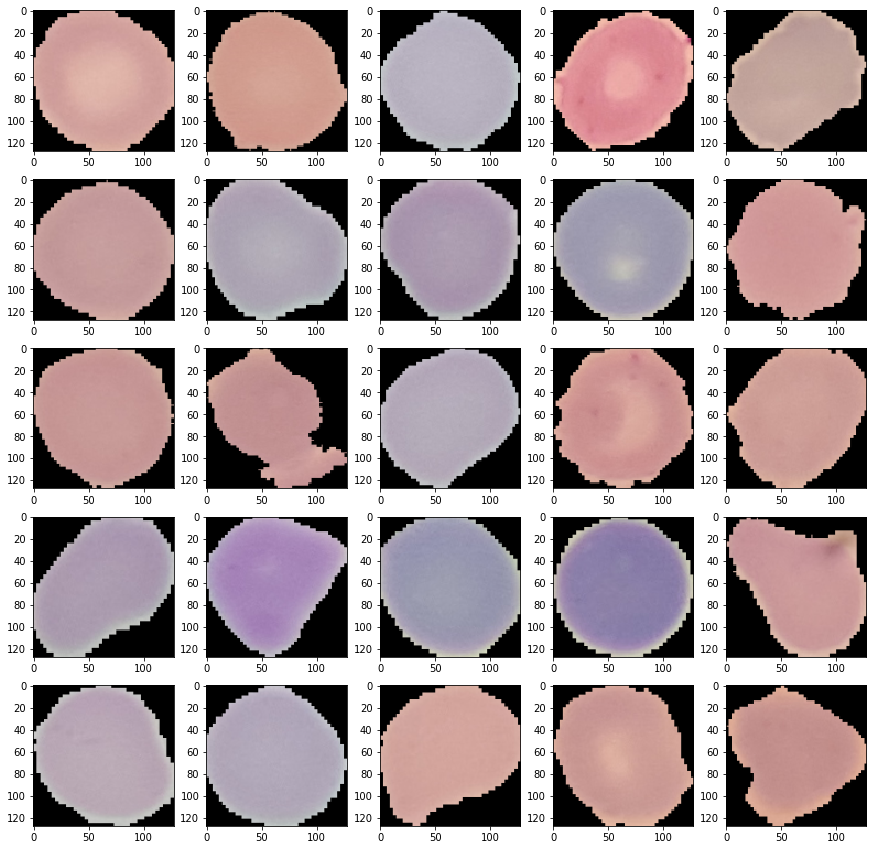

In [9]:
image_dir = "data/train/Uninfected/"
filenames=random.sample(os.listdir(image_dir),26)

#Display 25 images from Uninfected cells
plt.figure(figsize=(15,15))
for i in range(1,len(filenames)):
    row = i
    image = imageio.imread(image_dir+filenames[i]) #Image(filename=image_dir+filenames[i])
    plt.subplot(5,5,row)
    plt.imshow(image)
plt.show()

#### Observations: 

From the above sample images, we can clearly see that infected cells have got a red globular structures whereas the uninfected cells have no red globular structures in them. So, in most certainty the red globular structures are an indicator whether a person is infected with Malaria or not. But, we don't know it for sure. We will try to build a model which is robust in determining these sort of hidden patterns in the cell images. Also, if you look at the cell shape for the uninfected images, they tend to be more round in shape. While the infected cells tends to have a distorted cell shapes. However, this analogy is based on the image we see above, hence we cannot generalize this analogy for all the image types!

## Deep Learning models

In [13]:
#Import the deep learning libraries
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
from keras.optimizers import RMSprop
from keras import regularizers as reg
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
from keras import optimizers
from keras.callbacks import History

%matplotlib inline

### 1. Building a basic CNN model 

#### Declare the initial parameters for the neural network

In [11]:
#Dimensions of our flicker images is 256 X 256
img_width, img_height = 128, 128

#Declaration of parameters needed for training and validation
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 16000 #8000 training samples for each class
nb_validation_samples = 6000 #3000 validation samples for each class
epochs = 40
batch_size = 20

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

#### Encoding the class labels into binary numbers

In [ ]:
#Encode the class labels to binary vectors
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(y_train)

y_train_enc=encoder.transform(y_train)
y_val_enc=encoder.transform(y_val)

#### Declaring the model architecture for our base model

In [14]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(),metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
__________